## Ejercicio 1: Construcción de una RNN para Clasificación de Tweets

Instrucciones:

1. Descargar el dataset Twitter Sentiment Analysis Dataset.
1. Preprocesar los tweets: limpieza, tokenización, padding.
1. Construir y entrenar una RNN utilizando LSTM para clasificar los tweets en positivos o negativos.
1. Evaluar el modelo y reportar la precisión.

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [42]:

# 1. Leer CSV directamente desde URL 
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [43]:
df['label'].value_counts()


label
0    29720
1     2242
Name: count, dtype: int64

Los datos estan muy desbalanceados

In [39]:
# 1. Verifica qué valores hay realmente
print(df['label'].unique())


[0 1]


In [44]:
# 2. Limpiar columnas (el dataset tiene texto y sentimiento)
df = df[['label', 'tweet']]
df = df.dropna()

In [45]:

# 3. Balancear el dataset con undersampling

# Separar positivos y negativos
df_pos = df[df['label'] == 1]
df_neg = df[df['label'] == 0]

# Igualar número de negativos a positivos
df_neg_down = resample(df_neg, replace=False, n_samples=len(df_pos), random_state=42)

# Combinar y mezclar
df_balanced = pd.concat([df_pos, df_neg_down]).sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar nuevo balance
print(df_balanced['label'].value_counts())


label
1    2242
0    2242
Name: count, dtype: int64


In [46]:
# 4. Preprocesamiento: tokenización y padding

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df_balanced['tweet'])

sequences = tokenizer.texts_to_sequences(df_balanced['tweet'])

max_len = 50  # límite de tokens por tweet
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
labels = np.array(df_balanced['label'])


In [47]:
# 5. División en entrenamiento y validación

X_train, X_val, y_train, y_val = train_test_split(
    padded, labels, test_size=0.2, random_state=42, stratify=labels
)


In [48]:
# 6. Crear modelo LSTM

vocab_size = len(tokenizer.word_index) + 1

model = Sequential([
    Embedding(vocab_size, 64, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/Users/isaromobru/Desktop/DS102024_/.venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
# 7. Entrenar modelo

history = model.fit(
    X_train, y_train,
    epochs=3,
    validation_data=(X_val, y_val),
    batch_size=64
)


Epoch 1/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.5076 - loss: 0.6946 - val_accuracy: 0.5006 - val_loss: 0.6931
Epoch 2/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.4932 - loss: 0.6936 - val_accuracy: 0.5006 - val_loss: 0.6933
Epoch 3/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5158 - loss: 0.6888 - val_accuracy: 0.7280 - val_loss: 0.5816


In [50]:
# 8. Evaluar precisión final

loss, acc = model.evaluate(X_val, y_val)
print(f"\n✅ Precisión en validación: {acc:.2f}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7275 - loss: 0.5850

✅ Precisión en validación: 0.73


## Ejercicio 2: Generación de Texto con GRU

Instrucciones:

1. Utilizar el corpus de obras de Shakespeare.
1. Preprocesar el texto y crear secuencias de caracteres.
1. Construir y entrenar una RNN con GRU para generar texto.
1. Generar un fragmento de texto a partir de una semilla. 

In [5]:
import tensorflow_datasets as tfds

# 👇 Elimina `as_supervised=True`
data, info = tfds.load('tiny_shakespeare', with_info=True)

# Obtener el texto
text_data = ""
for example in tfds.as_numpy(data['train']):
    text_data += example["text"].decode("utf-8")


2025-03-28 13:01:03.355915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
# Crear un vocabulario de caracteres únicos
vocab = sorted(set(text_data))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = {i: u for i, u in enumerate(vocab)}

# Convertir texto en números
text_as_int = [char2idx[c] for c in text_data]

# Definir la longitud de las secuencias
seq_length = 100
examples_per_epoch = len(text_data) // seq_length

# Crear los pares de input-target
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)


In [7]:
# Batch size
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)


In [14]:
embedding_dim = 128
rnn_units = 256

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
        tf.keras.Input(batch_shape=(batch_size, None)),
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GRU(
            rnn_units,
            return_sequences=True,
            stateful=True,
            recurrent_initializer='glorot_uniform'
        ),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)


In [15]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)

EPOCHS = 5
history = model.fit(dataset, epochs=EPOCHS)


Epoch 1/5


155/155 ━━━━━━━━━━━━━━━━━━━━ 141s 845ms/step - loss: 3.0382
Epoch 2/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 163s 969ms/step - loss: 2.1076
Epoch 3/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 122s 756ms/step - loss: 1.8787
Epoch 4/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 110s 690ms/step - loss: 1.7333
Epoch 5/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 103s 645ms/step - loss: 1.6469


In [18]:
def generate_text(model, start_string, num_generate=500, temperature=1.0):
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []
    
    # Resetear estados de la GRU
    model.layers[1].reset_states()

    for _ in range(num_generate):
        predictions = model(input_eval)
        predictions = predictions[:, -1, :] / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Probar
print(generate_text(gen_model, start_string="ROMEO: "))

ROMEO: lows is an eye
He hat we on the death be right?

ETWARD IV:
Hoo on lettle and all and prides
thank, as that ere ran from me fail as the colium,
Shall dishoman her to mine highant: I will in to been
We taign.

KIS KING RICHARD:
if ye, king? what thou art then strance;
Or but keep thee!
Fortom me, I probe me haths, shall before our waspide and Toither?

PRIFLIUS:
Poous Romen's seet stancy in the good

Fill'd parise tempy thou will counted well.

JOLIUS:
O, to me to brace of though qulaiser;
How be


## Ejercicio 3: Predicción de Series Temporales con RNN

Instrucciones:

1. Utilizar datos históricos de temperatura.
1. Preprocesar y normalizar los datos.
1. Crear secuencias para el entrenamiento.
1. Construir y entrenar una RNN con LSTM para predecir temperaturas futuras.
1. Evaluar y visualizar las predicciones.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Cargar datos reales desde URL (u otro CSV)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url, parse_dates=['Date'])

# Visualizar
df.head()


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [20]:
# Convertir la columna de temperatura a array
temps = df['Temp'].values

# Normalizar entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
temps_scaled = scaler.fit_transform(temps.reshape(-1, 1))


In [21]:
# Crear secuencias tipo sliding window
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(temps_scaled, window_size)

# División train/test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# se aseguura de tener 3D para LSTM: (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=False, input_shape=(window_size, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Entrenar
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


/Users/isaromobru/Desktop/DS102024_/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0680 - val_loss: 0.0101
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0117 - val_loss: 0.0098
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0116 - val_loss: 0.0094
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0105 - val_loss: 0.0094
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0104 - val_loss: 0.0084
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0101 - val_loss: 0.0081
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0096 - val_loss: 0.0087
Epoch 9/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0096 - val_loss: 0.0086
Epoch 10/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0096 - val_loss: 0.0076


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


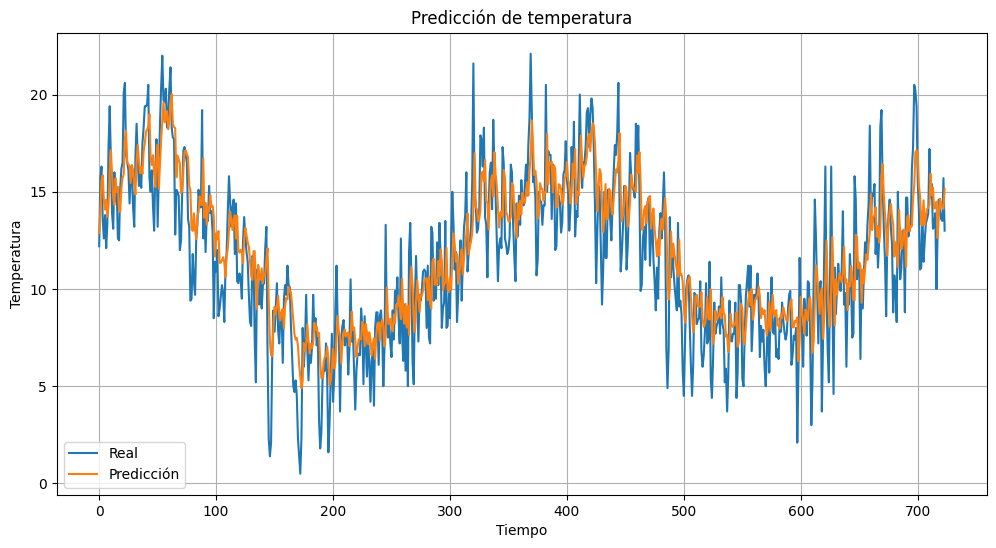

In [23]:
# Predicción
predictions = model.predict(X_test)

# Desescalar
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Graficar
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Real')
plt.plot(predictions_rescaled, label='Predicción')
plt.title('Predicción de temperatura')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()
